In [ ]:
# İlgili kütüphaneler import edilir

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv", delimiter=",", encoding="ISO-8859-1")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [2]:
print(df.columns)

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [3]:
df.name.unique()

array(['Royal Enfield Classic 350', 'Honda Dio',
       'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]', 'Yamaha SZ [2013-2014]',
       'Honda CB Twister', 'Honda CB Hornet 160R',
       'Royal Enfield Bullet 350 [2007-2011]', 'Hero Honda CBZ extreme',
       'Bajaj Discover 125', 'Yamaha FZ16', 'Honda Navi',
       'Bajaj Avenger Street 220', 'Yamaha YZF R3', 'Jawa 42',
       'Suzuki Access 125 [2007-2016]', 'Hero Honda Glamour',
       'Yamaha YZF R15 S', 'Yamaha FZ25', 'Hero Passion Pro 110',
       'Honda Navi [2016-2017]', 'Honda Activa i', 'Jawa Standard',
       'Royal Enfield Thunderbird 350', 'Honda Dream Yuga',
       'TVS Apache RTR 160 4V', 'Yamaha Fazer [2009-2016]',
       'Hero Honda Splendor NXG', 'Hero Glamour 125',
       'Yamaha FZ S [2012-2016]', 'Hero Xtreme Sports', 'Honda X-Blade',
       'Honda CB Shine SP', 'Honda Activa 5G', 'Honda CBR-250R',
       'Hero Honda Passion PRO [2012]', 'Bajaj Dominar 400',
       'Hero Glamour F

In [4]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [5]:
import pandas as pd

# Ortalama ile eksik değerleri doldurma
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(), inplace=True)

# Güncellenmiş veriyi kontrol et
print(df.isnull().sum())  # Eksik değerlerin olup olmadığını kontrol et


name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

# Nesne veri türüne sahip sütunları seçme
object_columns = ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price' ]

# LabelEncoder nesnelerini depolamak için bir sözlük oluşturma
le_dict = {}

# Her bir nesne sütunu için LabelEncoder uygulama
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    le_dict[column] = le

# Dönüştürülmüş DataFrame'i gösterme
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,179,112,26,1,0,0,161
1,145,53,24,1,0,48,161
2,183,107,25,1,0,94,193
3,260,70,22,1,0,158,164
4,269,19,18,1,1,148,161
...,...,...,...,...,...,...,...
1056,0,14,17,1,0,300,35
1057,140,12,19,1,0,190,29
1058,21,11,20,1,1,199,66
1059,132,6,16,1,0,244,72


In [8]:
# Assuming you have your dataset X and target y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,179,112,26,1,0,0,161
1,145,53,24,1,0,48,161
2,183,107,25,1,0,94,193
3,260,70,22,1,0,158,164
4,269,19,18,1,1,148,161
...,...,...,...,...,...,...,...
1056,0,14,17,1,0,300,35
1057,140,12,19,1,0,190,29
1058,21,11,20,1,1,199,66
1059,132,6,16,1,0,244,72


FeatureImportances(ax=<Axes: >,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   topn=6)

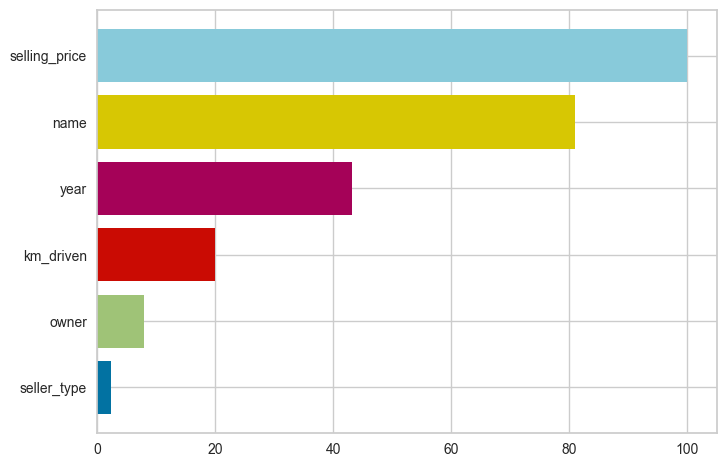

In [12]:
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances

column_names = x_train.columns.tolist()

regressor = XGBRegressor()

viz = FeatureImportances(regressor, topn=6)

viz.fit(x_train, y_train)

In [13]:
# Özellik isimlerini alın
feature_names = viz.features_

# İlk 6 özelliğin isimlerini alın
top_6_feature_names = feature_names[:6]

print(top_6_feature_names)

['seller_type' 'owner' 'km_driven' 'year' 'name' 'selling_price']


In [14]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
#Test verilerini kullanarak çıktıyı tahmin et
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [16]:
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini_Sonuc"])

In [17]:
import pandas as pd

# Model ile tahmin yapma
y_pred = model.predict(x_test)

# y_pred ve y_test verilerini DataFrame'e dönüştürme
y_pred_df = pd.DataFrame(data=y_pred, columns=["Tahmini_Sonuc"])
y_test_df = pd.DataFrame(data=y_test.values, columns=["Gerçek_Sonuç"])

# y_test_df ve y_pred_df DataFrame'lerini birleştirme
karsılastırma_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Sonuçların görüntülenmesi
karsılastırma_df

,Gerçek_Sonuç,Tahmini_Sonuc
0,161,164.798462
1,95,108.232880
2,161,159.723923
3,161,168.074158
4,177,166.942612
...,...,...
208,161,77.768364
209,161,160.960785
210,84,81.021027
211,134,128.456619


In [18]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hatası (Mean Squared Error - MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 17.312009869606843
Mean Squared Error (MSE): 902.0867643266602


NameError: name 'np' is not defined

In [ ]:
from sklearn.metrics import r2_score

x_train = r2_score(y_train, y_pred_train)
x_test = r2_score(y_test,y_pred)

print(f"Eğitim seti tahmin: {x_train}\n\nTest seti tahmin: {x_test}")

Eğitim seti tahmin: 0.9977013855715824

Test seti tahmin: 0.6748736072960884


In [ ]:
import joblib

# Modeli kaydet
joblib.dump(model, "xgb_model.joblib")

# Seçilen özellik isimlerini kaydet
joblib.dump(top_6_feature_names, "top_6_feature_names.joblib")

['top_6_feature_names.joblib']

In [ ]:
import joblib

# Özellik isimlerini yükleme
top_6_feature_names = joblib.load("top_6_feature_names.joblib")
top_6_feature_names

array(['seller_type', 'owner', 'km_driven', 'year', 'name',
       'selling_price'], dtype=object)

In [ ]:
df.selling_price.unique()

array([112,  53, 107,  70,  19,  17,  80, 113,  38,  58,  43,  34,  81,
       126, 114,  29,  49,  99,  11,  31,  41,  95,  51,  21,  63,  47,
        52,  69,  68,  89, 101,  84,  37,  73,  57,  42, 110,  36,  90,
         2, 108, 105,  22,  23,  28,  76,  15,  65,  83, 103, 123, 128,
       115, 102,  62,  74,  93, 104, 111, 100,  24,  50,  56,  45,   6,
        33,   5,  64,  66,  87, 106,   4,   7,  14, 119,  61, 120,  91,
       117, 116, 121, 127, 129,  46, 125, 109, 122,  72, 124,  32,  79,
         3,  48,  44,  12,  82,   9,  18,  10,  26,  27,  60,  55,  94,
        97,   0,  86,  35,   1,  25,  71,  20,   8,  54,  39,  88,  16,
        59,  75,  85,  13,  92,  78,  77,  98,  67, 118,  30,  96,  40],
      dtype=int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnelerini depoladığınız sözlüğü kullanarak geri dönüşüm yapma
def inverse_transform_column(df, column, le):
    # Sütunun etiketlenmiş değerlerini orijinal değerlerine geri dönüştürür
    df[column] = le.inverse_transform(df[column])
    return df

# Her bir nesne sütunu için inverse_transform uygulama
for column, le in le_dict.items():
    df = inverse_transform_column(df, column, le)

# Dönüştürülmüş DataFrame'in orijinal halini gösterme
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


In [ ]:
sample_one = [{
    'seller_type': 'Individual',
    'owner': '1st owner',
    'km_driven': '5650',
    'year': '26',
    'name': 'Honda Dio',
    'selling_price':  '45000',
}]

In [ ]:
import pandas as pd
df_s = pd.DataFrame(sample_one)
df_s

,seller_type,owner,km_driven,year,name,selling_price
0,Individual,1st owner,5650,26,Honda Dio,45000


In [ ]:
#scaler = joblib.load(open("scaler.joblib","rb"))
model = joblib.load(open("xgb_model.joblib","rb"))
#df_s = scaler.transform(df_s)

In [ ]:
# model = joblib.load("model.joblib")